In [46]:
import pandas as pan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plotter
%matplotlib inline
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [19]:
(feature_train, label_train), (feature_test, label_test) = mnist.load_data() 

In [20]:
test_img = feature_train[0]

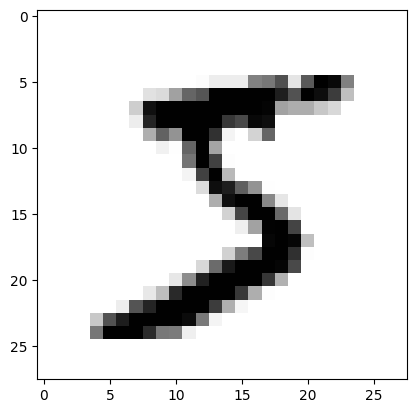

In [21]:
plotter.imshow(test_img, cmap = "binary")

In [22]:
#convert the labels into categorical labels with to_categorical
cat_label_test = to_categorical(label_test, num_classes = 10)
cat_label_train = to_categorical(label_train, num_classes = 10)

In [25]:
#scaling
feature_train = feature_train/255
feature_test = feature_test/255

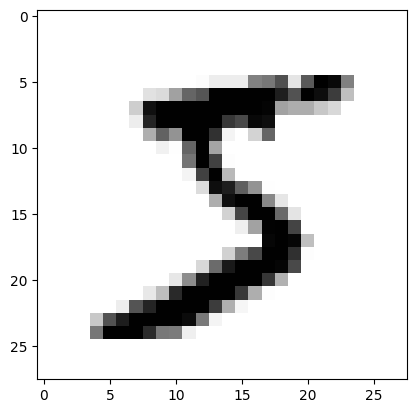

In [27]:
plotter.imshow(feature_train[0], cmap = "binary")

In [28]:
#reshaping to correct for color vals (n_images, width, height, color channels)
feature_train = feature_train.reshape(60000, 28, 28, 1)
feature_test = feature_test.reshape(10000, 28, 28, 1)

In [32]:
stopper = EarlyStopping(monitor = "val_loss", patience = 5)
image_learner = Sequential()
image_learner.add(Conv2D(filters = 32, kernel_size = (4, 4), strides = (2, 2), input_shape = (28, 28, 1), activation = "relu"))
image_learner.add(MaxPool2D(pool_size = (2, 2)))
image_learner.add(Flatten())
image_learner.add(Dense(128, activation = "relu"))
image_learner.add(Dense(10, activation = "softmax")) #remember, softmax(multiclass), sigmoid(bin-class), and relu(regression)
image_learner.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
image_learner.fit(x = feature_train, y = cat_label_train, epochs = 20, validation_data = (feature_test, cat_label_test), callbacks = [stopper])

Epoch 1/20
1875/1875 [==============================] - 15s 5ms/step - loss: 0.1916 - accuracy: 0.9441 - val_loss: 0.0780 - val_accuracy: 0.9755
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0541 - val_accuracy: 0.9822
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0458 - val_accuracy: 0.9840
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0401 - val_accuracy: 0.9861
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0406 - val_accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0476 - val_accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0411 - val_accura

In [34]:
metrics = pan.DataFrame(image_learner.history.history)

<Axes: >

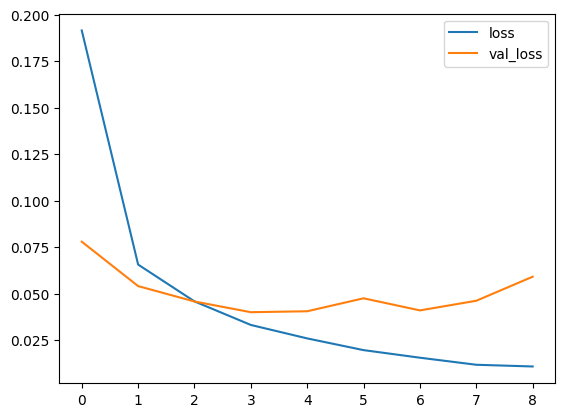

In [35]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

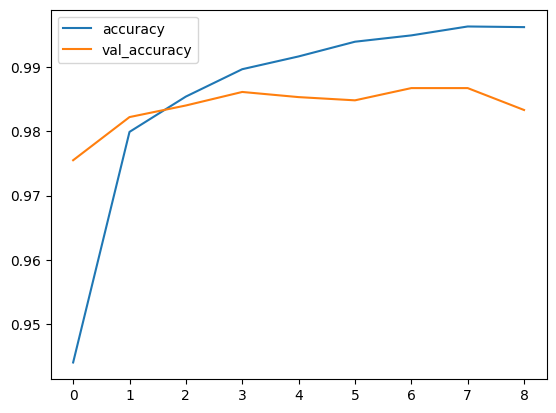

In [36]:
metrics[["accuracy", "val_accuracy"]].plot()

In [38]:
predictions = np.argmax(image_learner.predict(feature_test), axis = -1)

313/313 [==============================] - 1s 2ms/step


In [42]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Axes: >

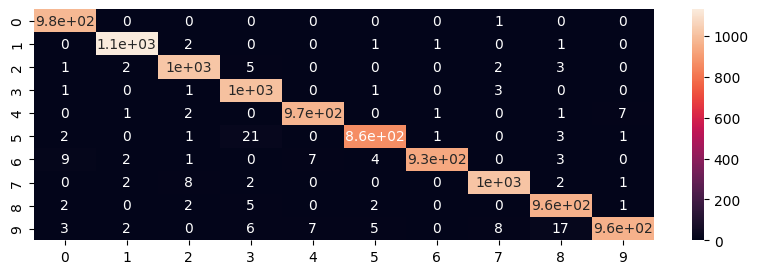

In [50]:
plotter.figure(figsize = (10, 3))
sns.heatmap(confusion_matrix(label_test, predictions), annot = True)